In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [89]:
df=pd.read_csv('yield_df.csv')
df.drop(['Unnamed: 0','Year'], axis=1, inplace=True)
df

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,36613,1485.0,121.00,16.37
1,Albania,Potatoes,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",23333,1485.0,121.00,16.37
3,Albania,Sorghum,12500,1485.0,121.00,16.37
4,Albania,Soybeans,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,22222,657.0,2550.07,19.76


In [90]:
df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [91]:
df['Item'] = df['Item'].replace({'Rice, paddy': 'Rice', 'Plantains and others': 'Plantains'})

In [93]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
df.head()

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,albania,maize,36613,1485.0,121.0,16.37
1,albania,potatoes,66667,1485.0,121.0,16.37
2,albania,rice,23333,1485.0,121.0,16.37
3,albania,sorghum,12500,1485.0,121.0,16.37
4,albania,soybeans,7000,1485.0,121.0,16.37


In [94]:
df.describe().T #.T is for transpose

,count,mean,std,min,25%,50%,75%,max
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [95]:
df.describe(include='object')# for object type

,Area,Item
count,28242,28242
unique,101,10
top,india,potatoes
freq,4048,4276


In [96]:
#droping countres with less than 100 recored
country_count=df['Area'].value_counts()
df=df[df['Area'].isin(country_count[country_count>100].index)]
df


,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
99,algeria,maize,16500,89.0,1828.92,17.48
100,algeria,potatoes,78936,89.0,1828.92,17.48
101,algeria,rice,28000,89.0,1828.92,17.48
102,algeria,sorghum,16571,89.0,1828.92,17.48
103,algeria,wheat,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...
28237,zimbabwe,rice,22581,657.0,2550.07,19.76
28238,zimbabwe,sorghum,3066,657.0,2550.07,19.76
28239,zimbabwe,soybeans,13142,657.0,2550.07,19.76
28240,zimbabwe,sweet potatoes,22222,657.0,2550.07,19.76


In [97]:
area_encoder=LabelEncoder()
item_encoder=LabelEncoder()
df['Area']=area_encoder.fit_transform(df['Area'])
df['Item']=item_encoder.fit_transform(df['Item'])

joblib.dump(area_encoder,'area_encoder.joblib')
joblib.dump(item_encoder,'item_encoder.joblib')



['item_encoder.joblib']

In [98]:
df.head()

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
99,0,1,16500,89.0,1828.92,17.48
100,0,3,78936,89.0,1828.92,17.48
101,0,4,28000,89.0,1828.92,17.48
102,0,5,16571,89.0,1828.92,17.48
103,0,8,6315,89.0,1828.92,17.48


In [99]:
X=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=28)

In [101]:
model=BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [102]:
joblib.dump(model,'yield_predictor.joblib')

['yield_predictor.joblib']

Accuracy: 97.86%
Root Mean Squared Error: 12352.92
R2 Score: 0.98


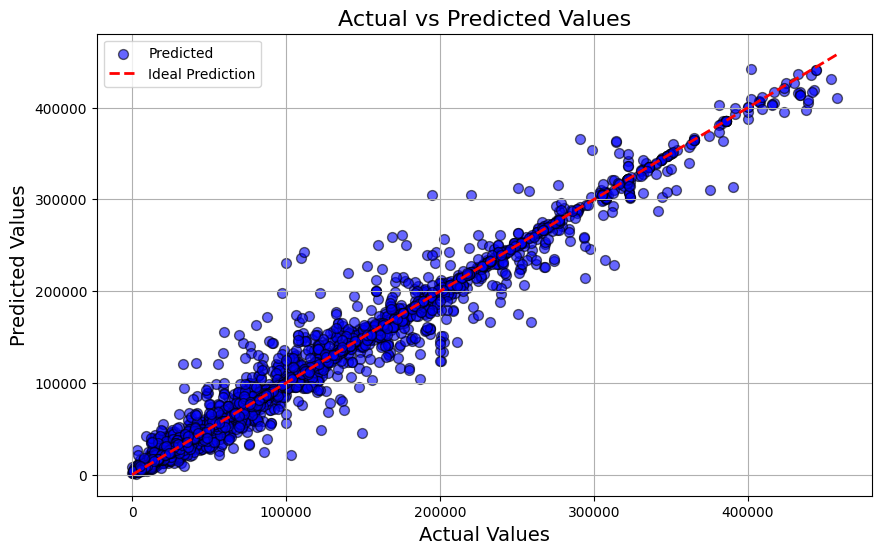

In [103]:
accuracy=model.score(X_test,y_test)
y_pred=model.predict(X_test)
RMSE=mean_squared_error(y_test,y_pred) **0.5
r2=r2_score(y_test,y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Root Mean Squared Error: {RMSE:.2f}')
print(f'R2 Score: {r2:.2f}')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, s=50, color='blue', edgecolor='black', alpha=0.6, label='Predicted')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, linestyle='--', label='Ideal Prediction')
plt.legend(loc='upper left')
plt.show()


In [113]:
model.predict([[0	,4,	89.0	,1828.92,17.48]])[0]

20178.7

In [114]:
area_encoder.transform(['india'])[0]  

30